# Pokemon analysis

In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
!pip install plotly

In [3]:
df = pd.read_csv('../Data/pokemon.csv')

## Exploratory Analysis

In [4]:
df.head(5)

abilities  against_bug  ...  generation  is_legendary
0  ['Overgrow', 'Chlorophyll']          1.0  ...           1             0
1  ['Overgrow', 'Chlorophyll']          1.0  ...           1             0
2  ['Overgrow', 'Chlorophyll']          1.0  ...           1             0
3     ['Blaze', 'Solar Power']          0.5  ...           1             0
4     ['Blaze', 'Solar Power']          0.5  ...           1             0

[5 rows x 41 columns]

### How is the data distributed?

In [5]:
df.describe()

against_bug  against_dark  ...  generation  is_legendary
count   801.000000    801.000000  ...  801.000000    801.000000
mean      0.996255      1.057116  ...    3.690387      0.087391
std       0.597248      0.438142  ...    1.930420      0.282583
min       0.250000      0.250000  ...    1.000000      0.000000
25%       0.500000      1.000000  ...    2.000000      0.000000
50%       1.000000      1.000000  ...    4.000000      0.000000
75%       1.000000      1.000000  ...    5.000000      0.000000
max       4.000000      4.000000  ...    7.000000      1.000000

[8 rows x 34 columns]

### What kind of data do they have?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [7]:
df = df.convert_dtypes()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    string 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

### % Legendary Pokemon

In [9]:
fig = plt.figure(figsize=(7,7))

colours = ["aqua", "orange"]
pokeLeg = df[df['is_legendary']==1]
pokeNon = df[df['is_legendary']==0]

legDist = [pokeLeg['name'].count(),pokeNon['name'].count()]
legPie = plt.pie(legDist,
                 labels = ['Legendary', 'Non Legendary'], 
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colours,
                 startangle = 45,
                 explode=(0, 0.1))

### How are they distributed by generation?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



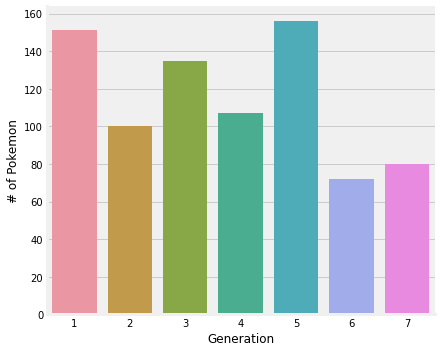

In [10]:
sns.factorplot(
    x='generation', 
    data=df,
    height=5,
    aspect=1.2,
    kind='count'
).set_axis_labels('Generation', '# of Pokemon')

plt.show()

### Types that are legendary

In [11]:
fig = px.bar(df, y='is_legendary', x='type1', text='hp')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

### List of variables by type and skills

In [12]:
df = df[df['type2'].isnull()].loc[
    :, ['sp_attack', 'sp_defense', 'attack', 'defense', 'speed', 'hp', 'type1']
]
df

sp_attack  sp_defense  attack  defense  speed  hp     type1
3           60          50      52       43     65  39      fire
4           80          65      64       58     80  58      fire
6           50          64      48       65     43  44     water
7           65          80      63       80     58  59     water
8          135         115     103      120     78  79     water
..         ...         ...     ...      ...    ...  ..       ...
781         45          45      55       65     45  45    dragon
788         29          31      29       31     37  43   psychic
789         29         131      29      131     37  43   psychic
795        173          71      89       71     83  83  electric
799        127          89     107      101     79  97   psychic

[384 rows x 7 columns]

In [13]:
X = df.iloc[:,:-1].values
X

array([[60, 50, 52, 43, 65, 39],
       [80, 65, 64, 58, 80, 58],
       [50, 64, 48, 65, 43, 44],
       ...,
       [29, 131, 29, 131, 37, 43],
       [173, 71, 89, 71, 83, 83],
       [127, 89, 107, 101, 79, 97]], dtype=object)

In [14]:
X_norm = normalize(X)
X_norm

array([[0.46853557, 0.39044631, 0.40606416, 0.33578383, 0.5075802 ,
        0.30454812],
       [0.47938582, 0.38950098, 0.38350866, 0.34755472, 0.47938582,
        0.34755472],
       [0.38450164, 0.4921621 , 0.36912158, 0.49985214, 0.33067141,
        0.33836145],
       ...,
       [0.14643103, 0.66146433, 0.14643103, 0.66146433, 0.1868258 ,
        0.21712188],
       [0.69641534, 0.28581208, 0.35827148, 0.28581208, 0.33411834,
        0.33411834],
       [0.5127391 , 0.3593211 , 0.43199279, 0.40776889, 0.31894794,
        0.39161963]])

In [15]:
y = df.iloc[:, -1].values
y

<StringArray>
[    'fire',     'fire',    'water',    'water',    'water',      'bug',
      'bug',   'poison',   'poison', 'electric',
 ...
 'fighting',    'water',   'normal',   'normal',   'normal',   'dragon',
  'psychic',  'psychic', 'electric',  'psychic']
Length: 384, dtype: string

In [16]:
lda = LinearDiscriminantAnalysis(n_components=3)
lda

LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [17]:
lda.fit(X_norm, y)
lda

LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Text(47.620000000000005, 0.5, 'Pokemon type')

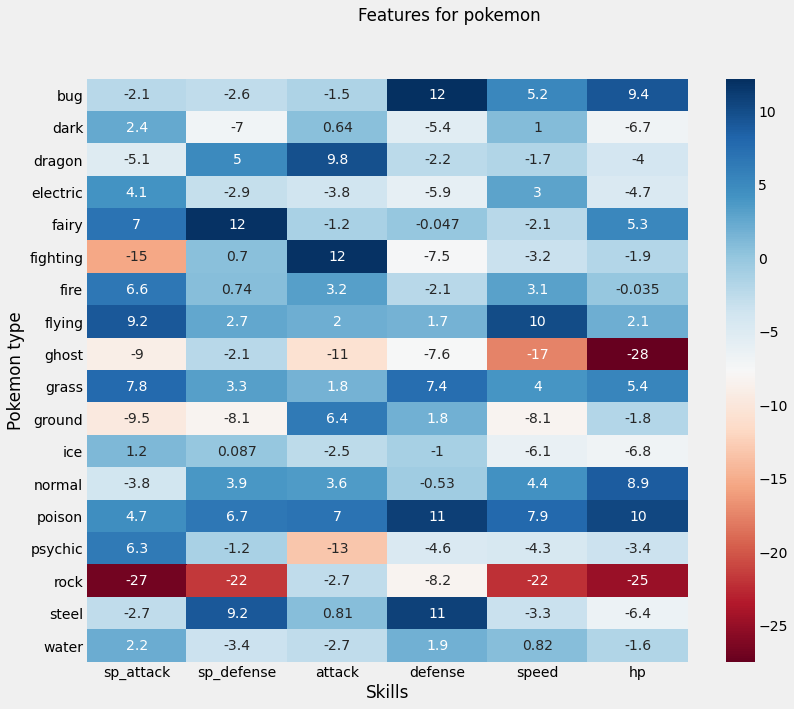

In [18]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sns.heatmap(pd.DataFrame(lda.coef_, 
                         columns=df.columns[:-1], 
                         index=[lda.classes_]), 
            ax=ax, cmap='RdBu', annot=True)
plt.suptitle('Features for pokemon')
plt.xlabel('Skills')
plt.ylabel('Pokemon type')